# About the Dataset:

1. id: unique id for a news article
2. title: the title of a news article
3. author: author of the news article
4. text: the text of the article; could be incomplete
5. label: a label that marks whether the news article is real or fake:
           1: Fake news
           0: real News





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the Dependencies

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data Pre-processing

In [5]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Fake News Detection/train.csv')

In [6]:
news_dataset.shape

(20800, 5)

In [7]:
# print the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [52]:
real=news_dataset[news_dataset['label']==0]
fake=news_dataset[news_dataset['label']==1]

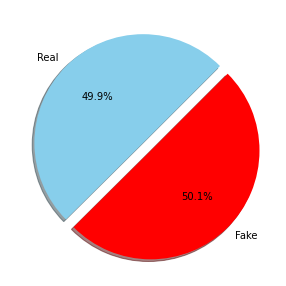

In [54]:
fig=plt.figure(figsize=(5,5))
colors=["skyblue",'red']
ck=[real['label'].count(),fake['label'].count()]
legpie=plt.pie(ck,labels=["Real","Fake"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [8]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [9]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [10]:
print(news_dataset['text'])

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object


# Stemming:

Stemming is the process of reducing a word to its Root word

example:
actor, actress, acting --> act

In [11]:
port_stem = PorterStemmer()

In [12]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [13]:
news_dataset['text'] = news_dataset['text'].apply(stemming)

In [14]:
print(news_dataset['text'])

0        hous dem aid even see comey letter jason chaff...
1        ever get feel life circl roundabout rather hea...
2        truth might get fire octob tension intellig an...
3        video civilian kill singl us airstrik identifi...
4        print iranian woman sentenc six year prison ir...
                               ...                        
20795    rapper unload black celebr met donald trump el...
20796    green bay packer lost washington redskin week ...
20797    maci today grew union sever great name america...
20798    nato russia hold parallel exercis balkan press...
20799    david swanson author activist journalist radio...
Name: text, Length: 20800, dtype: object


In [55]:
from wordcloud import WordCloud

In [56]:
realdata = news_dataset[ news_dataset['label'] == 1]
realdata = realdata['text']
negdata = news_dataset[news_dataset['label'] == 0]
negdata= negdata['text']

In [57]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(stopwords=stopwords.words('english'),
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words are as follows


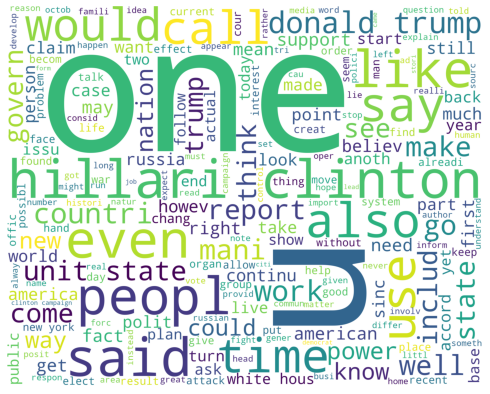

In [58]:
print("Positive words are as follows")
wordcloud_draw(realdata)

Negative words are as follows


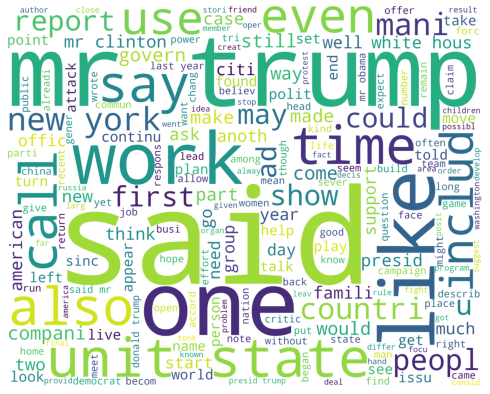

In [59]:
print("Negative words are as follows")
wordcloud_draw(negdata)

In [37]:
#separating the data and label
x = news_dataset['text']
y = news_dataset['label'].values

In [17]:
print(x)

0        hous dem aid even see comey letter jason chaff...
1        ever get feel life circl roundabout rather hea...
2        truth might get fire octob tension intellig an...
3        video civilian kill singl us airstrik identifi...
4        print iranian woman sentenc six year prison ir...
                               ...                        
20795    rapper unload black celebr met donald trump el...
20796    green bay packer lost washington redskin week ...
20797    maci today grew union sever great name america...
20798    nato russia hold parallel exercis balkan press...
20799    david swanson author activist journalist radio...
Name: text, Length: 20800, dtype: object


In [38]:
print(y)

[1 0 1 ... 0 1 1]


In [19]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

X = vectorizer.transform(x)

In [20]:
print(X)

  (0, 108701)	0.05247338102196001
  (0, 108648)	0.02039426321726478
  (0, 107704)	0.047239651687820045
  (0, 107700)	0.10136808063785403
  (0, 107657)	0.040374166404919226
  (0, 107620)	0.012086117790734634
  (0, 106976)	0.018383370414756055
  (0, 106176)	0.018269731853209667
  (0, 106088)	0.013396626135405348
  (0, 106003)	0.03120259501981026
  (0, 105927)	0.01374766445058099
  (0, 105727)	0.012597763189386674
  (0, 104888)	0.027660719789118264
  (0, 104853)	0.03349685835652778
  (0, 103857)	0.02301499513681735
  (0, 102455)	0.06985897849015364
  (0, 101772)	0.03541621007204582
  (0, 101522)	0.01750907631568824
  (0, 100755)	0.040639365493345306
  (0, 100117)	0.011840757024912692
  (0, 100107)	0.04614899718186797
  (0, 100055)	0.12133995257889348
  (0, 99907)	0.07641534922876257
  (0, 98625)	0.04211025487587547
  (0, 98062)	0.0289605384680031
  :	:
  (20799, 7405)	0.01072938433020128
  (20799, 7081)	0.028352482045912016
  (20799, 6788)	0.04019926502055583
  (20799, 6750)	0.02549682701

# Splitting the dataset to training & test data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

# Training the Model: Logistic Regression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(x_train, y_train)

LogisticRegression()

# Accuracy score

In [43]:
# accuracy score on the training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [44]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9712139423076923


In [45]:
# accuracy score on the test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [46]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9389423076923077


# Making a Predictive System

In [50]:
x_new = x_test[2]

prediction = model.predict(x_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [51]:
y_test[2]

1